In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 

# Import visualization tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!

# for local imports
import sys
sys.path.append('..')

# local imports
from plot_utils import *
from stat_utils import *

plt.style.use('ggplot')

# reading and selecting relevant data
df = pd.read_csv('../data/responses_complete_subheader.csv', 
                 encoding='utf-8-sig', header=[0,1], skipinitialspace=True)
df.dropna(how='any', inplace=True) # drop incomplete lines

In [2]:
df[["B5","TCI"]].describe()

B5                                                         TCI  \
                N           E           O           P           S          NS   
count  368.000000  368.000000  368.000000  368.000000  368.000000  368.000000   
mean    -0.149076   -0.344022    0.361929    0.077745    0.316087    0.079402   
std      1.131664    1.037833    1.000313    0.951583    0.994361    0.880716   
min     -2.530000   -3.960000   -2.170000   -3.140000   -2.350000   -2.080000   
25%     -0.950000   -0.910000   -0.250000   -0.630000   -0.350000   -0.535000   
50%     -0.300000   -0.250000    0.340000    0.160000    0.320000    0.010000   
75%      0.690000    0.410000    1.080000    0.780000    1.022500    0.660000   
max      2.930000    2.000000    2.550000    2.350000    2.460000    2.750000   

                                                                               
               HA          RD          PS          SD          CO          ST  
count  368.000000  368.000000  368.000000  368.000000  368.000000  368.000000  
mean    -0.204321   -0.247880    0.308179   -0.327609    0.164049    0.012391  
std      1.004478    1.060304    1.173451    1.024192    1.124903    1.317292  
min     -2.960000   -3.110000   -2.930000   -4.760000   -4.690000   -2.960000  
25%     -0.940000   -0.940000   -0.500000   -1.060000   -0.620000   -0.880000  
50%     -0.260000   -0.160000    0.280000   -0.330000    0.280000   -0.080000  
75%      0.350000    0.460000    1.130000    0.390000    0.970000    0.880000  
max      3.110000    2.400000    3.740000    2.090000    2.690000    4.960000

## Normality test of B5

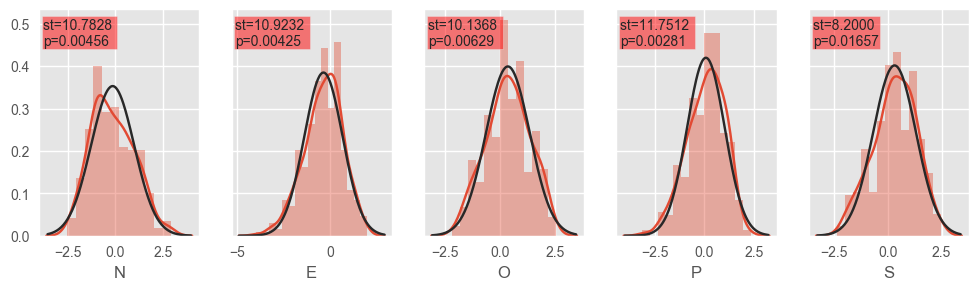

In [3]:
fig, axs = plt.subplots(ncols=len(df["B5"].columns), nrows=1, figsize=(12, 3), sharey=True)
for col, ax in zip(df["B5"].columns, axs):
    ntest = st.normaltest(df["B5"][col])
    sns.distplot( df["B5"][col], fit=st.norm, ax=ax)
    ax.text(ax.get_xlim()[0]+.2, 0.45, "st=%.4f \np=%.5f" % ntest, 
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':1}if ntest.pvalue < .05 else None)

## Normality test of TCI

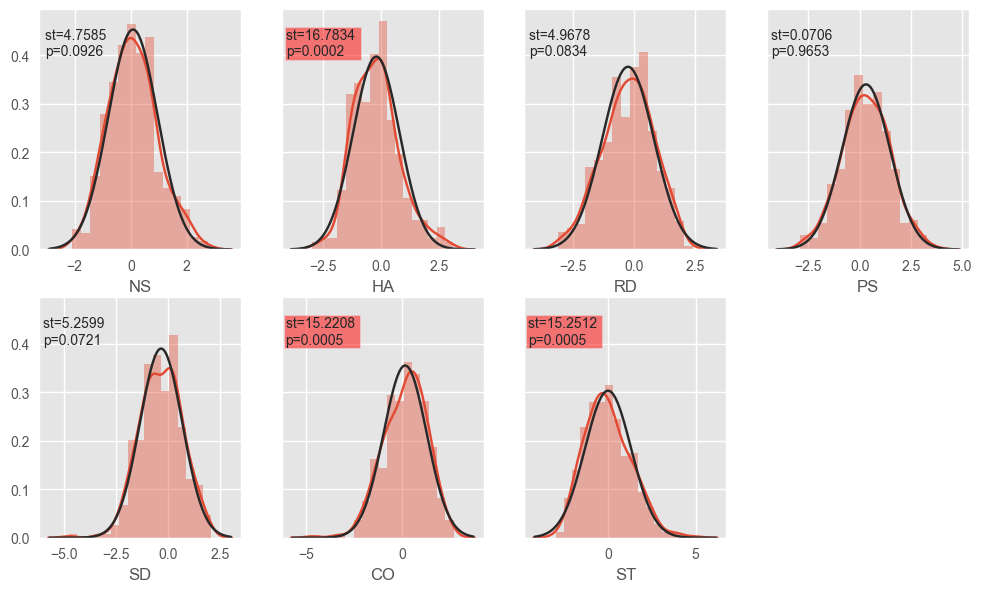

In [4]:
fig, axs = plt.subplots(ncols=len(df["TCI"].columns)/2 + 1, nrows=2, figsize=(12, 7), sharey=True)
for col, ax in zip(df["TCI"].columns, axs.flatten()):
    ntest = st.normaltest(df["TCI"][col])
    sns.distplot( df["TCI"][col], fit=st.norm, ax=ax)
    ax.text(ax.get_xlim()[0]+.2, 0.4, "st=%.4f \np=%.4f" % ntest, 
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':1}if ntest.pvalue < .005 else None)
axs[-1, -1].axis("off");


## Correlations between TCI, B5 and Age variables

In [5]:
corrs = df[[ "GP","TCI", "B5"]].corr()
# corrs.columns = corrs.columns.droplevel()
# corrs.index = corrs.index.droplevel()

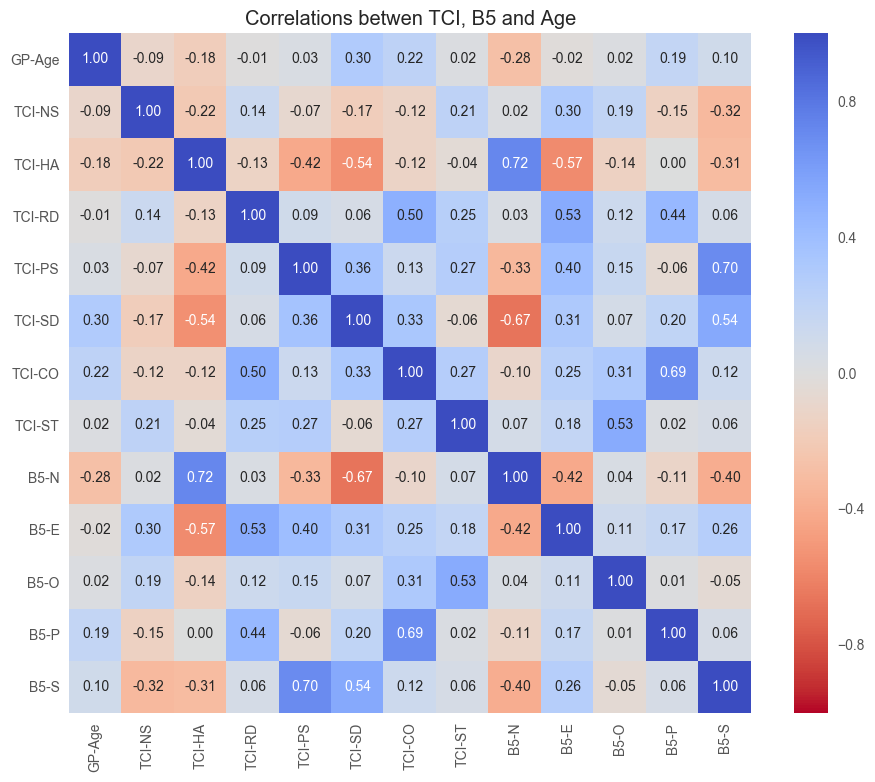

In [6]:
fig, ax = plt.subplots()

mask = np.zeros_like(corrs)
mask[np.triu_indices_from(np.zeros_like(corrs))]=True
sns.heatmap(corrs, ax=ax, annot=corrs, fmt="1.2f", cmap="coolwarm_r")
ax.set(title="Correlations betwen TCI, B5 and Age",  xlabel="", ylabel="")
fig.set_size_inches((11,9))

### Correlations higher than 0.5

In [7]:
cdf = corrs[(abs(corrs) > 0.5) & (corrs < 1)]
high_corrs = []
for i in range(len(cdf)):
    for j in range(i, len(cdf)):
        val = cdf.iloc[i][j]
        if not np.isnan(val):
            high_corrs.append(("-".join(cdf.index[i]), "-".join(cdf.columns[j]), val))
high_corrs = pd.DataFrame(high_corrs, columns=(0,1,"coef")).sort_values("coef", ascending=False)
high_corrs

,0,1,coef
1,TCI-HA,B5-N,0.720674
4,TCI-PS,B5-S,0.700053
7,TCI-CO,B5-P,0.691369
6,TCI-SD,B5-S,0.535415
8,TCI-ST,B5-O,0.528231
3,TCI-RD,B5-E,0.527627
0,TCI-HA,TCI-SD,-0.542225
2,TCI-HA,B5-E,-0.566465
5,TCI-SD,B5-N,-0.665399


## Distribution of TCI or B5 predictor by answer

In [8]:
hce_type = "IT"
predict = ("B5", "N")
hce_mean="GE"
quest1 = "IUds"
quest2 = "IUes"
data_e = pd.concat((df[quest1][hce_type], df[predict[0]][predict[1]]), axis=1)
data_e["Avib"] = quest1
data_d = pd.concat((df[quest2][hce_type], df[predict[0]][predict[1]]), axis=1)
data_d["Avib"] = quest2
pred_mean = df[predict[0]][predict[1]].mean()
data = pd.concat((data_e, data_d))

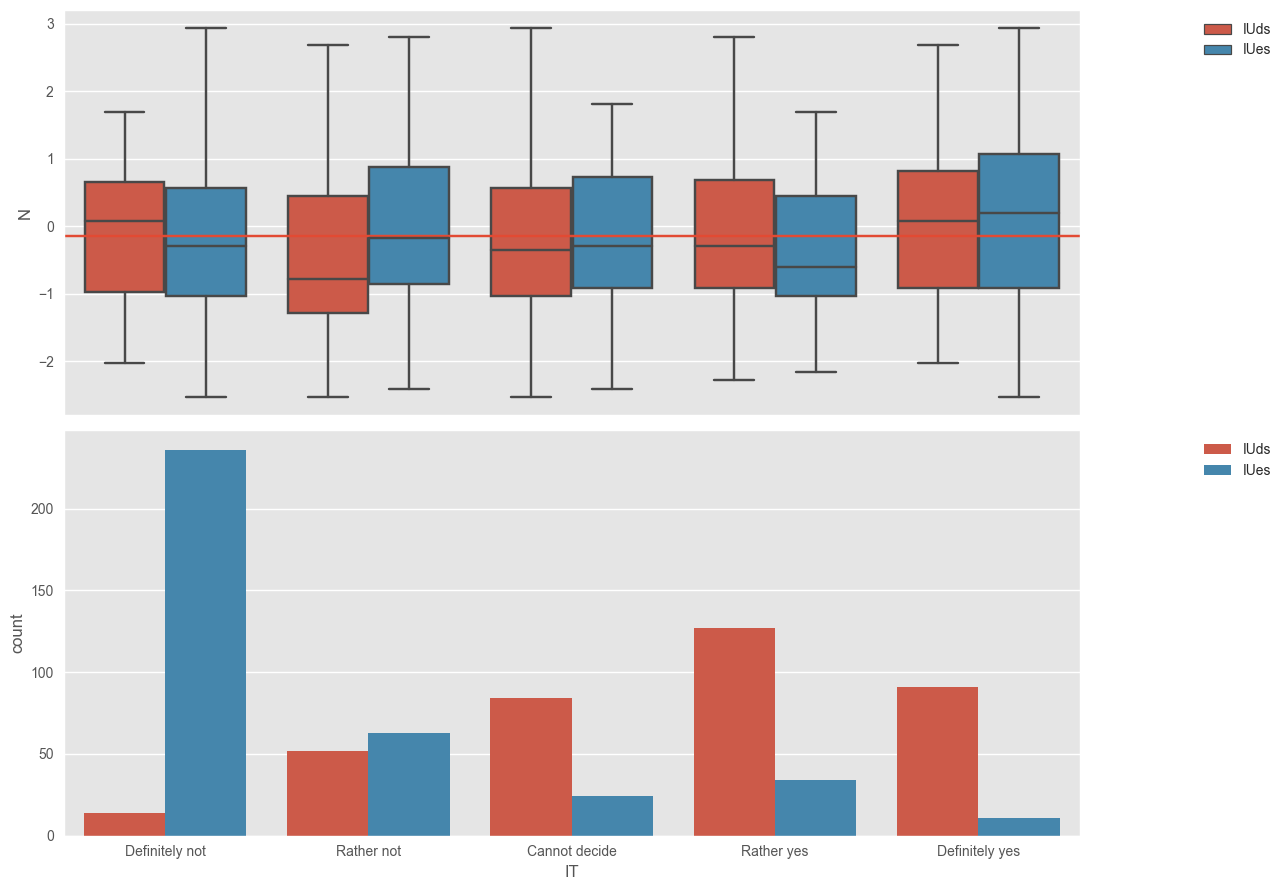

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
sns.boxplot(x=hce_type, y=predict[1], hue="Avib", data=data, ax=ax1, order=scale_other)
# sns.swarmplot(x="IT", y="PS", hue="Avib", data=data, ax=ax, color=)
ax1.plot([-.5, 4.5], [pred_mean, pred_mean])
ax1.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
ax1.set_xlabel("")

sns.countplot(x=hce_type, hue="Avib", data=data, ax=ax2, order=scale_other)
ax2.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

fig.tight_layout()

In [96]:
st.f_oneway(
df[df[quest1, hce_mean]=="Definitely yes"][predict[0]][predict[1]],
df[df[quest1, hce_mean]=="Rather yes"][predict[0]][predict[1]],
df[df[quest1, hce_mean]=="Cannot decide"][predict[0]][predict[1]],
df[df[quest1, hce_mean]=="Rather not"][predict[0]][predict[1]],
df[df[quest1, hce_mean]=="Definitely not"][predict[0]][predict[1]],

df[df[quest2, hce_mean]=="Definitely yes"][predict[0]][predict[1]],
df[df[quest2, hce_mean]=="Rather yes"][predict[0]][predict[1]],
df[df[quest2, hce_mean]=="Cannot decide"][predict[0]][predict[1]],
df[df[quest2, hce_mean]=="Rather not"][predict[0]][predict[1]],
df[df[quest2, hce_mean]=="Definitely not"][predict[0]][predict[1]]
)

F_onewayResult(statistic=0.68637553613761881, pvalue=0.72169114513267585)

In [97]:
TCI_bins = [-4, -2.5, -1.5, -.5, .5, 1.5, 2.5, 4]
TCI_bin_labs = ["<-2.5", "(-2.5,-1.5)","(-1.5,-.5)", "(-.5,.5)", "(.5,1.5)", "(1.5,2.5)", "2.5<"]
TCI_pr_binned = pd.cut(data[predict[1]], TCI_bins, labels=TCI_bin_labs)
data[predict[1]+"_bin"] = TCI_pr_binned

In [98]:
data_mat = {}
data_mat[quest2] = pd.concat([data[(data[predict[1]+"_bin"] == TCI_b) & (data["Avib"]==quest2)][hce_type].value_counts() 
                                  for TCI_b in TCI_bin_labs], 
                              axis=1).reindex(scale_other).fillna(0)
data_mat[quest2].columns = TCI_bin_labs

data_mat[quest1] = pd.concat([data[(data[predict[1]+"_bin"] == TCI_b) & (data["Avib"]==quest1)][hce_type].value_counts() 
                                      for TCI_b in TCI_bin_labs], 
                                  axis=1).reindex(scale_other).fillna(0)
data_mat[quest1].columns = TCI_bin_labs

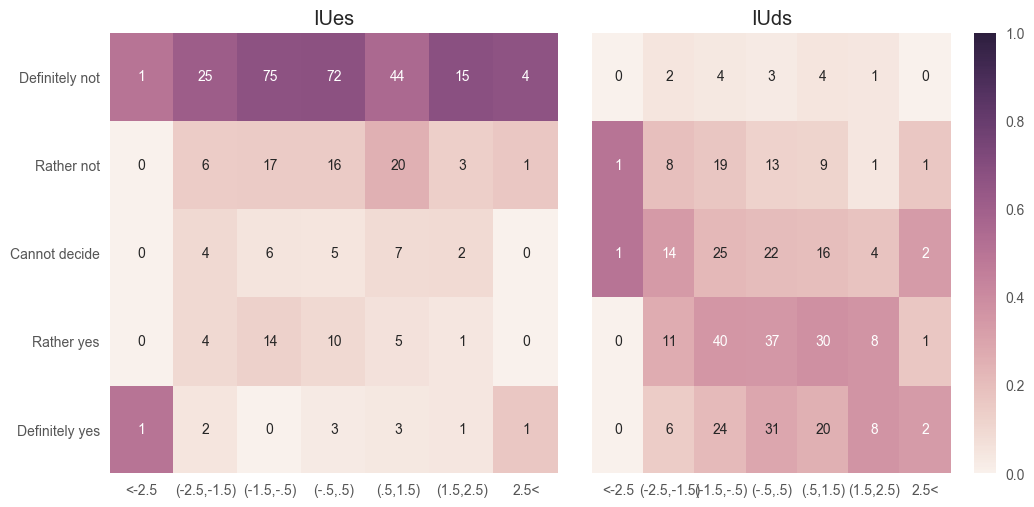

In [99]:
fig, (ax1, ax2 )= plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
fig.tight_layout()
sns.heatmap(data_mat[quest2] / data_mat[quest2].sum(), annot=data_mat[quest2], ax=ax1, vmin=0, vmax=1, cbar=False)
ax1.set(title=quest2)
sns.heatmap(data_mat[quest1] / data_mat[quest1].sum(), annot=data_mat[quest1], ax=ax2, vmin=0, vmax=1)
ax2.set(title=quest1)

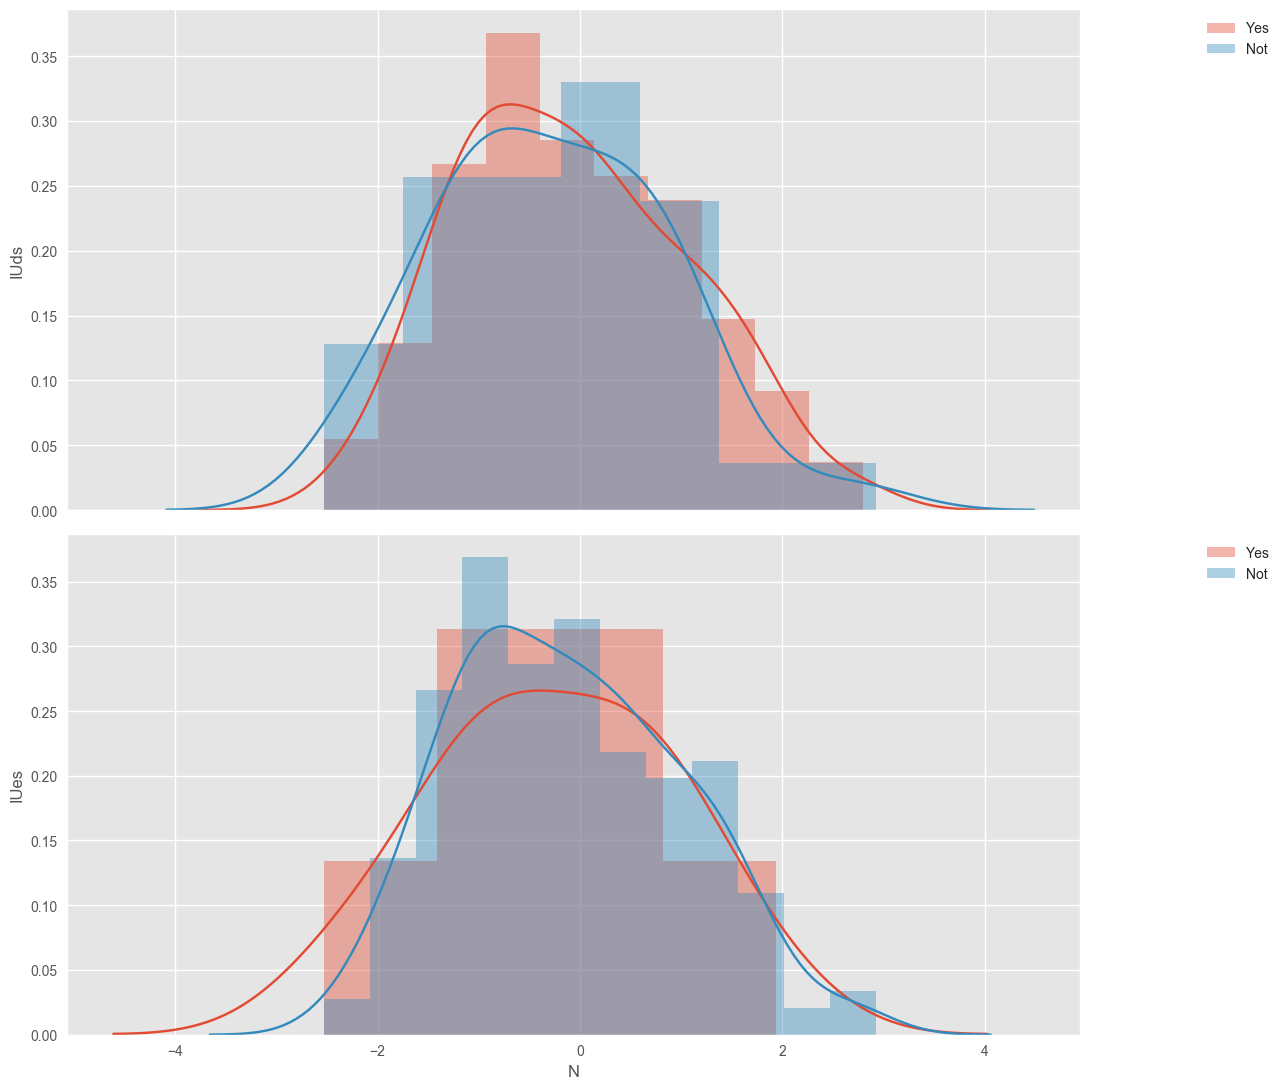

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11, 11))
sns.distplot(df[(df[quest1, hce_mean]=="Definitely yes")|(df[quest1, hce_mean]=="Rather yes")][predict[0]][predict[1]], ax=ax1, label="Yes")
sns.distplot(df[(df[quest1, hce_mean]=="Definitely not")|(df[quest1, hce_mean]=="Rather not")][predict[0]][predict[1]], ax=ax1, label="Not")
sns.distplot(df[(df[quest2, hce_mean]=="Definitely yes")|(df[quest2, hce_mean]=="Rather yes")][predict[0]][predict[1]], ax=ax2, label="Yes")
sns.distplot(df[(df[quest2, hce_mean]=="Definitely not")|(df[quest2, hce_mean]=="Rather not")][predict[0]][predict[1]], ax=ax2, label="Not")
ax1.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
ax1.set(ylabel=quest1, xlabel="")
ax2.set(ylabel=quest2)
fig.tight_layout()

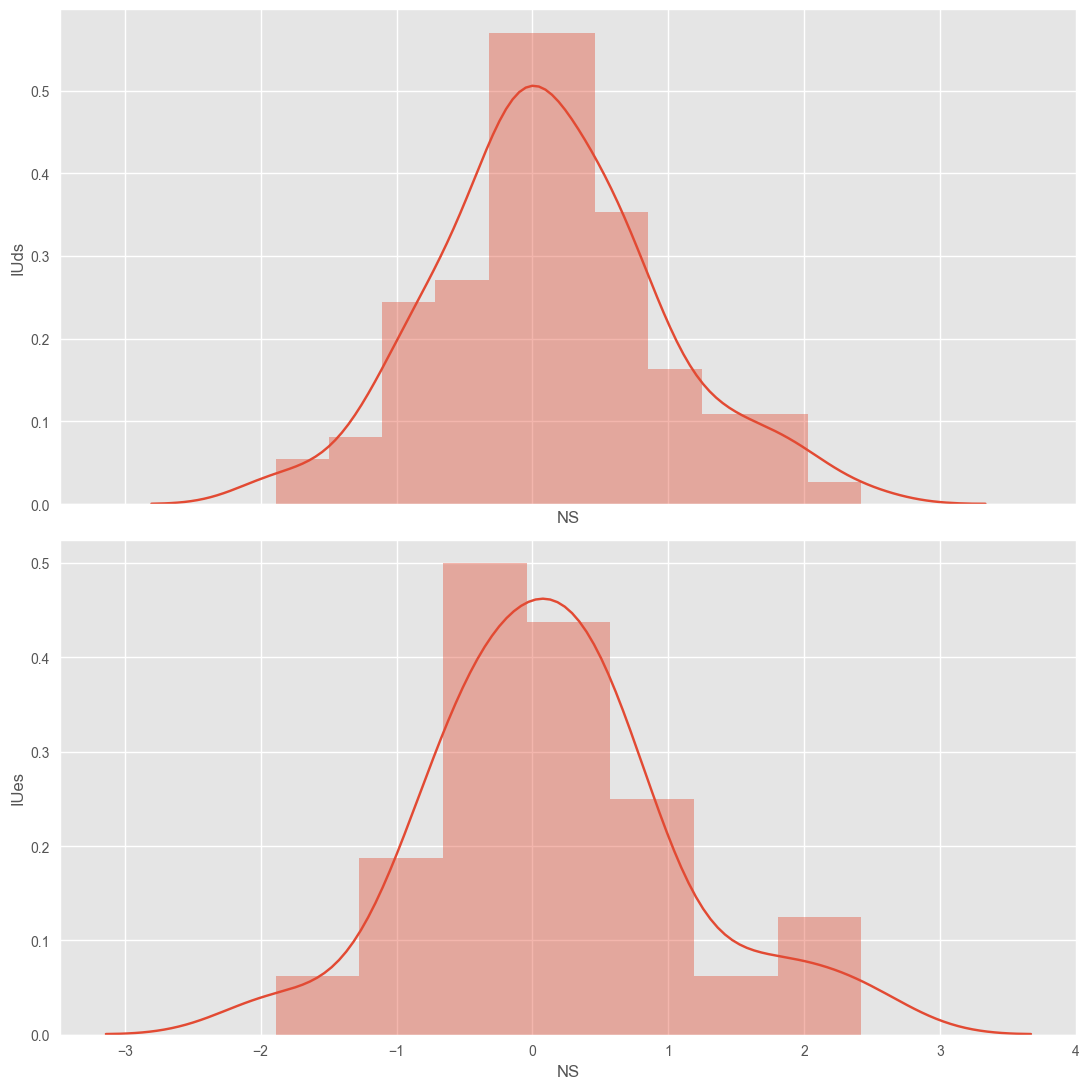

In [93]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11, 11))
sns.distplot(df[(df[quest1, hce_mean]=="Cannot decide")][predict[0]][predict[1]], ax=ax1)
sns.distplot(df[(df[quest2, hce_mean]=="Cannot decide")][predict[0]][predict[1]], ax=ax2)
# ax1.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
ax1.set(ylabel=quest1)
ax2.set(ylabel=quest2)
fig.tight_layout()